### Importação dos dados



In [21]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [22]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_as_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)


In [25]:
faturamento_loja = todas_as_lojas.groupby('Loja')['Preço'].sum().sort_values(ascending=False)
faturamento_loja = faturamento_loja.reset_index()
print(faturamento_loja)



     Loja       Preço
0  Loja 1  1534509.12
1  Loja 2  1488459.06
2  Loja 3  1464025.03
3  Loja 4  1384497.58


# 2. Vendas por Categoria


In [33]:
categorias_loja = todas_as_lojas.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Contagem')
mais_vendidas = categorias_loja.loc[categorias_loja.groupby('Loja')['Contagem'].idxmax()]

vendas_categoria = todas_as_lojas.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

print("\nCategoria mais vendida por loja:\n", mais_vendidas)
print("\nVendas por Categoria (total faturado):\n", vendas_categoria.reset_index())


Categoria mais vendida por loja:
       Loja Categoria do Produto  Contagem
6   Loja 1               moveis       465
14  Loja 2               moveis       442
22  Loja 3               moveis       499
30  Loja 4               moveis       480

Vendas por Categoria (total faturado):
     Categoria do Produto       Preço
0            eletronicos  2214099.72
1       eletrodomesticos  1766337.03
2                 moveis  1010214.00
3  instrumentos musicais   465029.67
4        esporte e lazer   190635.39
5             brinquedos    98140.86
6  utilidades domesticas    76773.38
7                 livros    50260.74


# 3. Média de Avaliação das Lojas



In [28]:
avaliacoes_loja = todas_as_lojas.groupby('Loja')['Avaliação da compra'].mean().sort_values()
print("\n Média de Avaliação por Loja:\n")
for loja, avaliação in avaliacoes_loja.items():
    print(f'{loja}: {avaliação:.2f}')


 Média de Avaliação por Loja:

Loja 1: 3.98
Loja 4: 4.00
Loja 2: 4.04
Loja 3: 4.05


# 4. Produtos Mais e Menos Vendidos

In [31]:
quantidade_produto = todas_as_lojas.groupby('Produto').size().sort_values()
produto_mais_vendido = quantidade_produto.idxmax()
produto_menos_vendido = quantidade_produto.idxmin()
print(f"\nProduto mais vendido: {produto_mais_vendido} com {quantidade_produto.max()} vendas")
print(f"Produto menos vendido: {produto_menos_vendido} com {quantidade_produto.min()} vendas")


Produto mais vendido: Cômoda com 210 vendas
Produto menos vendido: Celular ABXY com 157 vendas


# 5. Frete Médio por Loja


In [30]:
frete_medio_loja = todas_as_lojas.groupby('Loja')['Frete'].mean().sort_values()
print("\n Frete Médio por Loja:\n")
for loja, frete in frete_medio_loja.items():
    print(f'{loja}: {frete:.2f}')


 Frete Médio por Loja:

Loja 4: 31.28
Loja 3: 33.07
Loja 2: 33.62
Loja 1: 34.69


# graficos

<Figure size 1000x500 with 0 Axes>

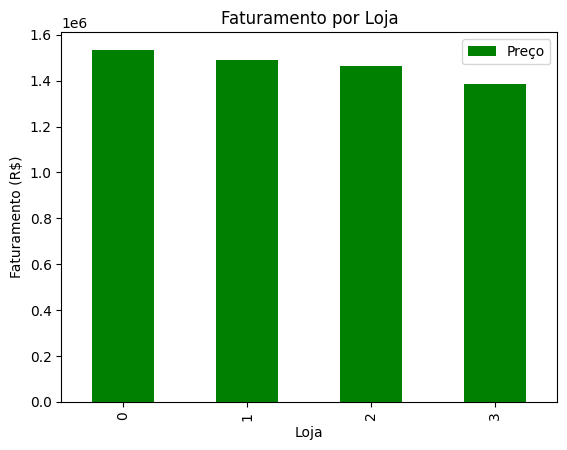

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
faturamento_loja.plot(kind='bar', color='green', title='Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.show()



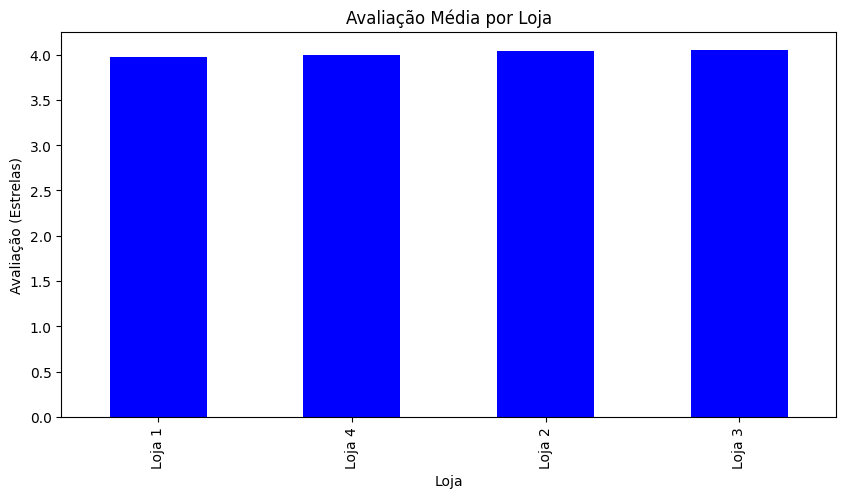

In [36]:
plt.figure(figsize=(10,5))
avaliacoes_loja.plot(kind='bar', color='blue', title='Avaliação Média por Loja')
plt.ylabel('Avaliação (Estrelas)')
plt.xlabel('Loja')
plt.show()

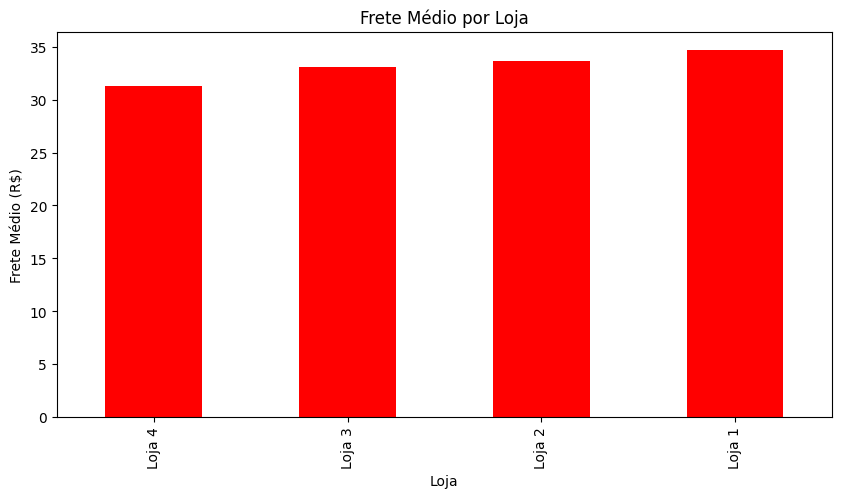

In [37]:

plt.figure(figsize=(10,5))
frete_medio_loja.plot(kind='bar', color='red', title='Frete Médio por Loja')
plt.ylabel('Frete Médio (R$)')
plt.xlabel('Loja')
plt.show()


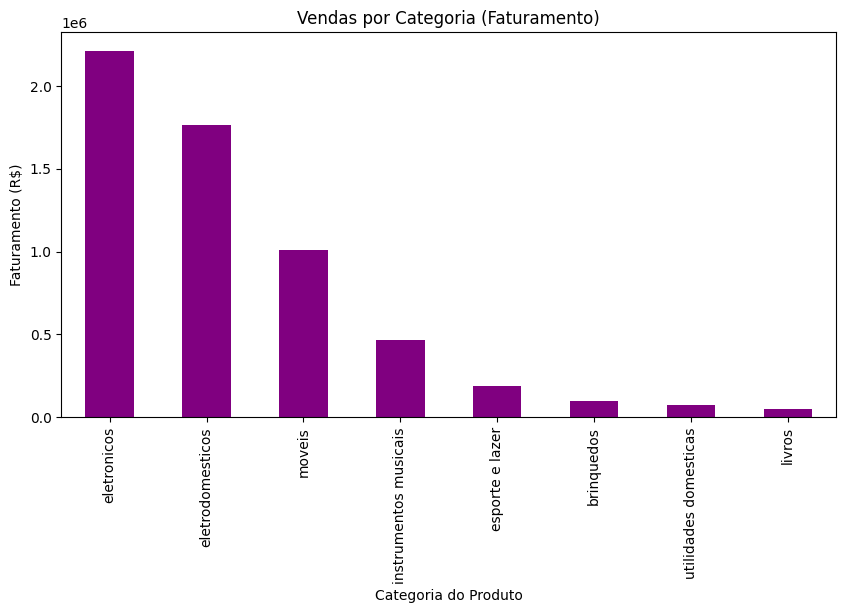

In [38]:
plt.figure(figsize=(10,5))
vendas_categoria.plot(kind='bar', color='purple', title='Vendas por Categoria (Faturamento)')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Categoria do Produto')
plt.show()

# Relatório de Análise

esse relatório apresenta a análise das quatro lojas da rede Alura Store, com base em dados de faturamento, avaliações dos clientes e custos médios de frete. O principal objetivo é fornecer uma visão clara para apoiar o Senhor João na decisão sobre qual loja vender.



In [44]:
faturamento = faturamento_loja.reset_index()
avaliacoes = avaliacoes_loja.reset_index()
frete = frete_medio_loja.reset_index()

resumo_lojas = faturamento.merge(avaliacoes, on='Loja').merge(frete, on='Loja')

print(resumo_lojas)



   index    Loja       Preço  Avaliação da compra      Frete
0      0  Loja 1  1534509.12             3.976685  34.691805
1      1  Loja 2  1488459.06             4.037304  33.621941
2      2  Loja 3  1464025.03             4.048326  33.074464
3      3  Loja 4  1384497.58             3.995759  31.278997


podemos analisar que:
a Loja 4 apresenta o menor faturamento, embora sua avaliação média esteja próxima das demais e o custo médio de frete seja o mais baixo.
ja a Loja 1 tem o maior faturamento, porém apresenta a avaliação média mais baixa e o frete médio mais alto, o que pode indicar desafios em satisfação do cliente e custo de entrega.

As lojas 2 e 3 apresentam um equilíbrio melhor entre todos os fatores apresentados.

Se a prioridade for focar nas lojas mais lucrativas e deixar para trás a menos relevante no faturamento, venderia a Loja 4. Se, por outro lado, quisesse focar em melhorar eficiência e satisfação, poderia pensar em vender a Loja 1, que tem ótimo faturamento, mas uma avaliação menor e o frete mais caro.

A decisão final sobre qual loja vender depende das prioridades estratégicas do Senhor João, a prioridade será na receita, custos operacionais ou experiência do cliente. Este relatório fornece as informações necessárias para uma escolha informada, destacando os pontos fortes e desafios de cada loja. Se eu fosse o Senhor João e quisesse simplificação e aumentar eficiência do grupo, venderia a Loja 4, por ter menor faturamento e menor impacto nas receitas totais.

# desempenho geografico

In [46]:
faturamento_local = todas_as_lojas.groupby('Local da compra')['Preço'].sum().sort_values(ascending=False)
print("\nFaturamento por Localização:\n", faturamento_local.reset_index())



Faturamento por Localização:
    Local da compra       Preço
0               SP  2419806.94
1               RJ   771412.90
2               MG   690814.92
3               RS   367611.78
4               PR   307757.16
5               SC   194401.69
6               BA   176053.80
7               DF   136502.84
8               GO   132492.61
9               PE   120764.28
10              ES   106834.71
11              CE    70799.98
12              MS    51329.96
13              MT    48582.84
14              PA    47176.43
15              MA    40949.76
16              RN    35846.21
17              PB    29506.37
18              PI    27864.05
19              AL    25823.67
20              TO    17778.47
21              RO    16423.52
22              SE    16323.63
23              AM     7848.60
24              RR     4197.79
25              AP     3781.44
26              AC     2804.44


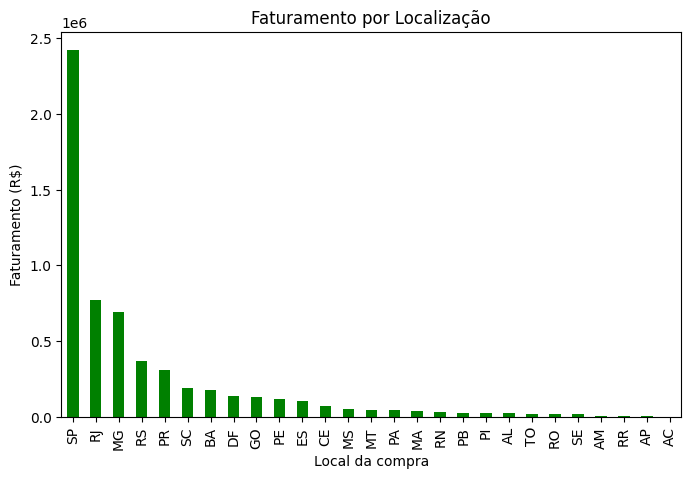

In [47]:
faturamento_local.plot(kind='bar', title='Faturamento por Localização', figsize=(8,5), color='green')
plt.ylabel('Faturamento (R$)')
plt.show()

In [48]:
avaliacoes_local = todas_as_lojas.groupby('Local da compra')['Avaliação da compra'].mean().sort_values(ascending=False)
print("\nAvaliações por Localização:\n", avaliacoes_local.reset_index())


Avaliações por Localização:
    Local da compra  Avaliação da compra
0               RN             4.208333
1               SP             4.113619
2               MT             4.112500
3               MS             4.097561
4               MG             4.090744
5               PB             4.086957
6               PR             4.078224
7               AM             4.071429
8               DF             4.020661
9               RS             4.018727
10              ES             4.017544
11              SC             4.011561
12              PE             3.977901
13              GO             3.940860
14              RO             3.894737
15              TO             3.827586
16              BA             3.803226
17              PI             3.800000
18              AP             3.777778
19              RJ             3.777228
20              PA             3.691358
21              MA             3.677419
22              AC             3.666667
23        

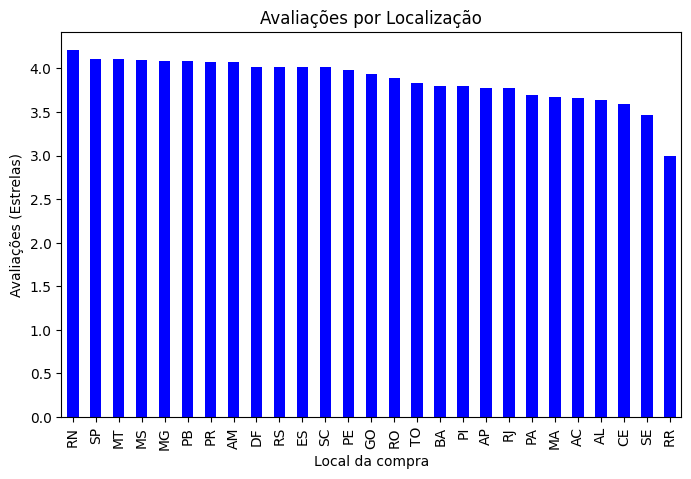

In [49]:
avaliacoes_local.plot(kind='bar', title='Avaliações por Localização', figsize=(8,5), color='blue')
plt.ylabel('Avaliações (Estrelas)')
plt.show()

In [50]:
frete_local = todas_as_lojas.groupby('Local da compra')['Frete'].mean().sort_values(ascending=True)
print("\nFrete Médio por Localização:\n", frete_local.reset_index())


Frete Médio por Localização:
    Local da compra       Frete
0               AP   21.646223
1               CE   25.002442
2               AM   29.368488
3               SC   29.838897
4               DF   30.185782
5               BA   30.257176
6               SE   30.487058
7               PA   30.633504
8               MT   32.691573
9               SP   32.709219
10              ES   33.199995
11              AL   33.258053
12              MG   33.460381
13              TO   33.462289
14              MS   33.694141
15              PB   33.910674
16              RJ   33.935633
17              PR   34.569335
18              MA   35.129564
19              PE   35.720970
20              RS   36.582407
21              PI   36.948903
22              GO   38.129811
23              RN   40.090987
24              RO   46.347240
25              AC   49.361324
26              RR  113.673032


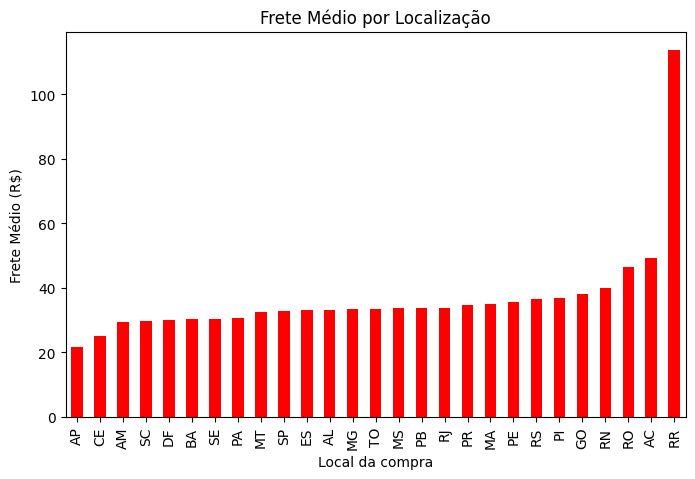

In [51]:
frete_local.plot(kind='bar', title='Frete Médio por Localização', figsize=(8,5), color='red')
plt.ylabel('Frete Médio (R$)')
plt.show()